<a href="https://colab.research.google.com/github/ShyamKumarChand/Collection-of-data/blob/master/Quantile_transform_irisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [48]:
X,Y = load_iris(return_X_y=True)

In [49]:
X_train,X_test, y_train, y_test=train_test_split(X,Y,random_state=0)

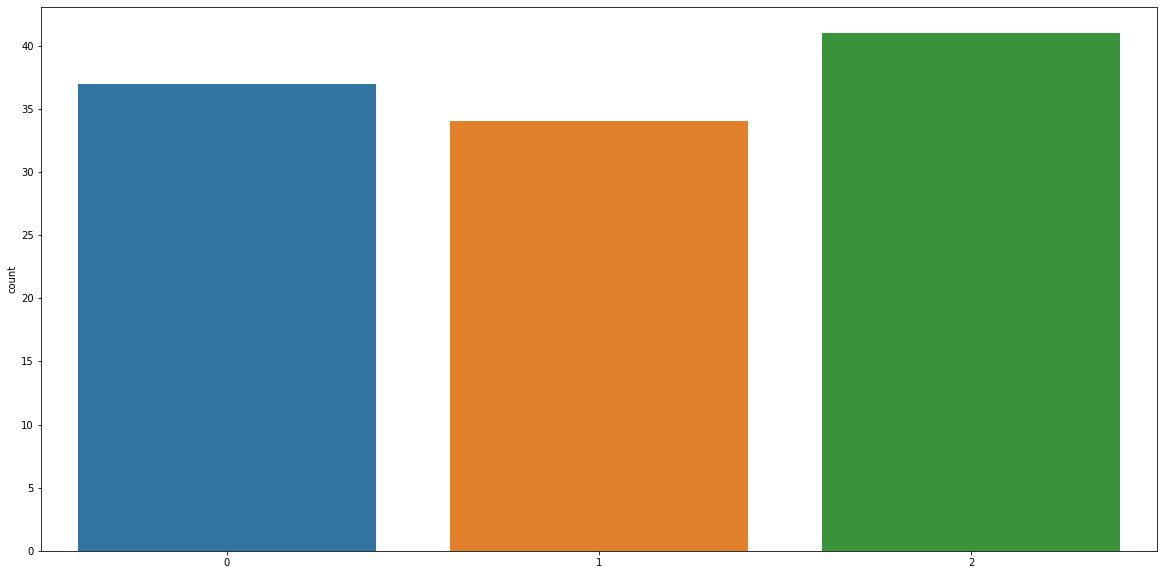

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,10))
sns.countplot(y_train)

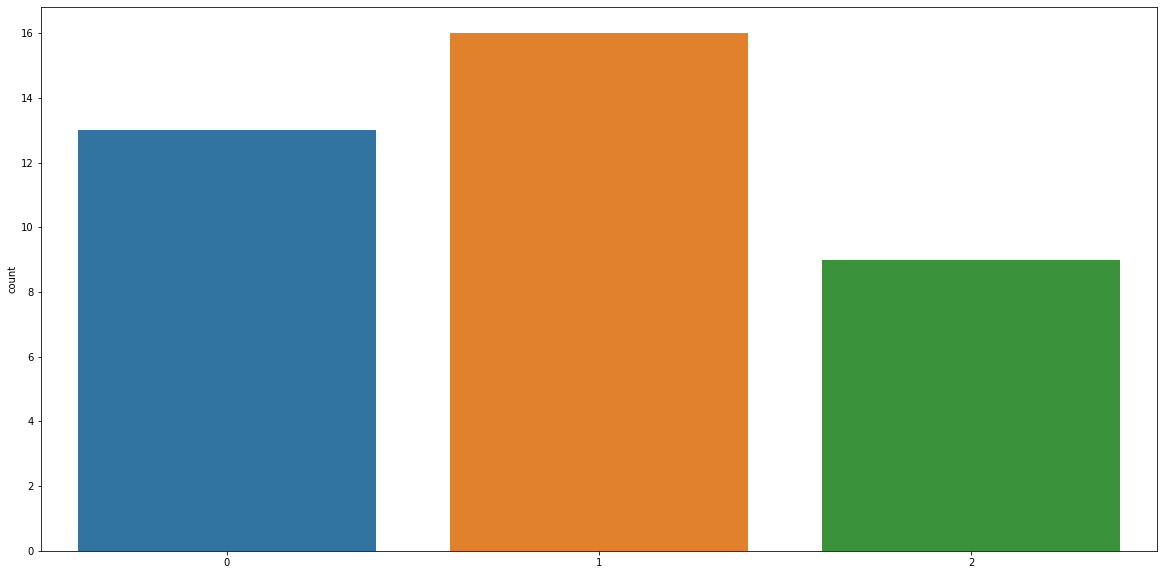

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(y_test)

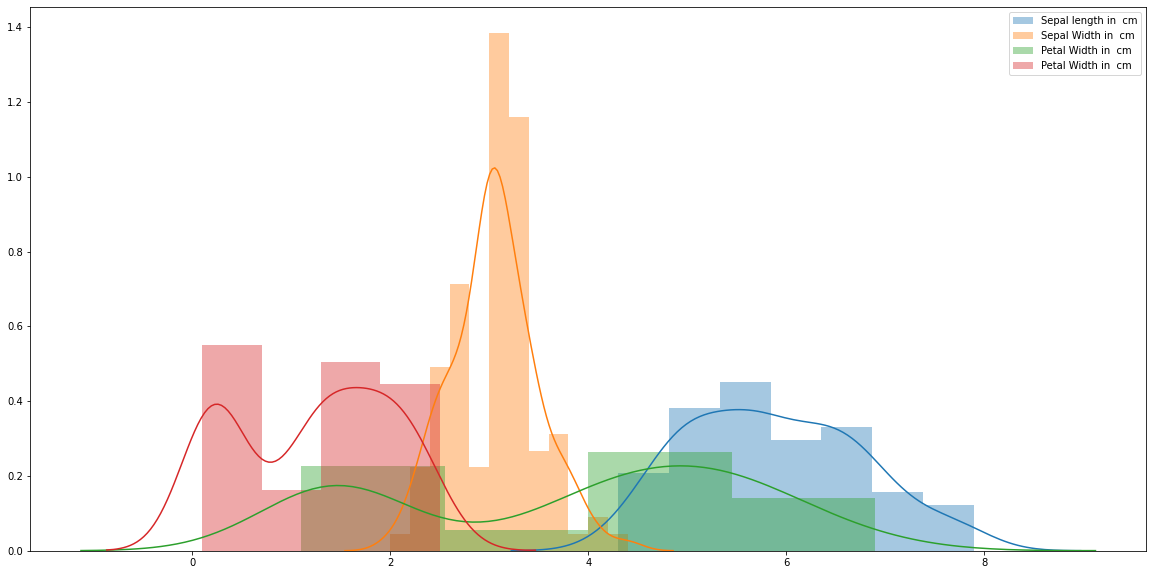

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(X_train[:,0],kde=True,label="Sepal length in  cm") # Sepal Length
sns.distplot(X_train[:,1],kde=True,label="Sepal Width in  cm") # Sepal Width
sns.distplot(X_train[:,2],kde=True,label="Petal Width in  cm") # Petal Length
sns.distplot(X_train[:,3],kde=True,label="Petal Width in  cm") # Petal Width
plt.legend()

Text(0, 0.5, 'Sepal width')

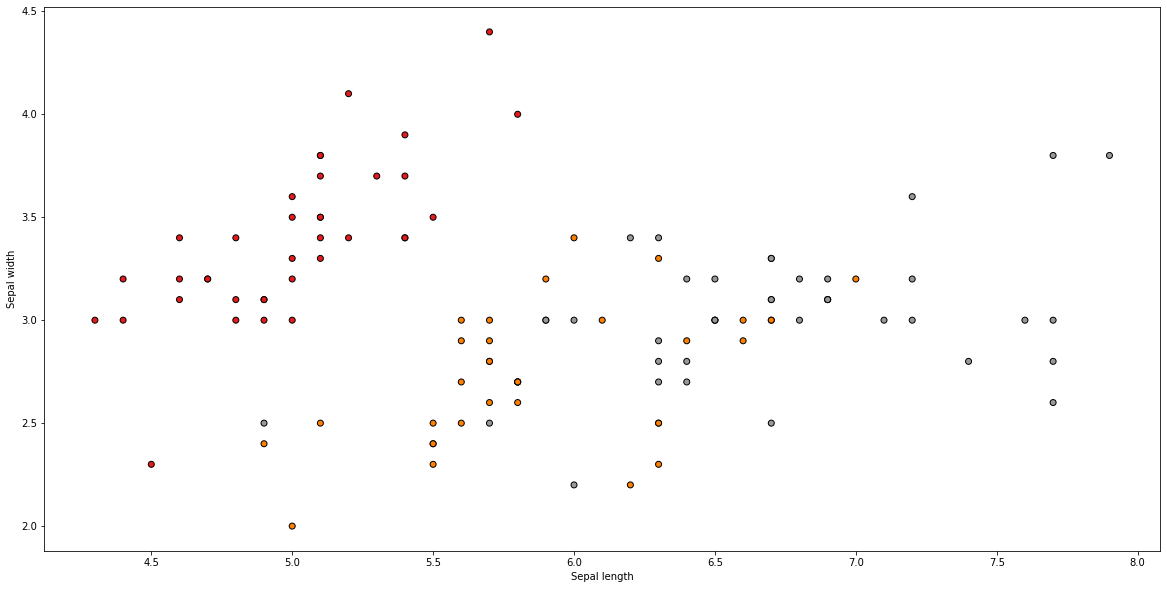

In [ ]:
# Only Trainng Samples
# Plot the training points
plt.figure(figsize=(20,10))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set1,
           edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

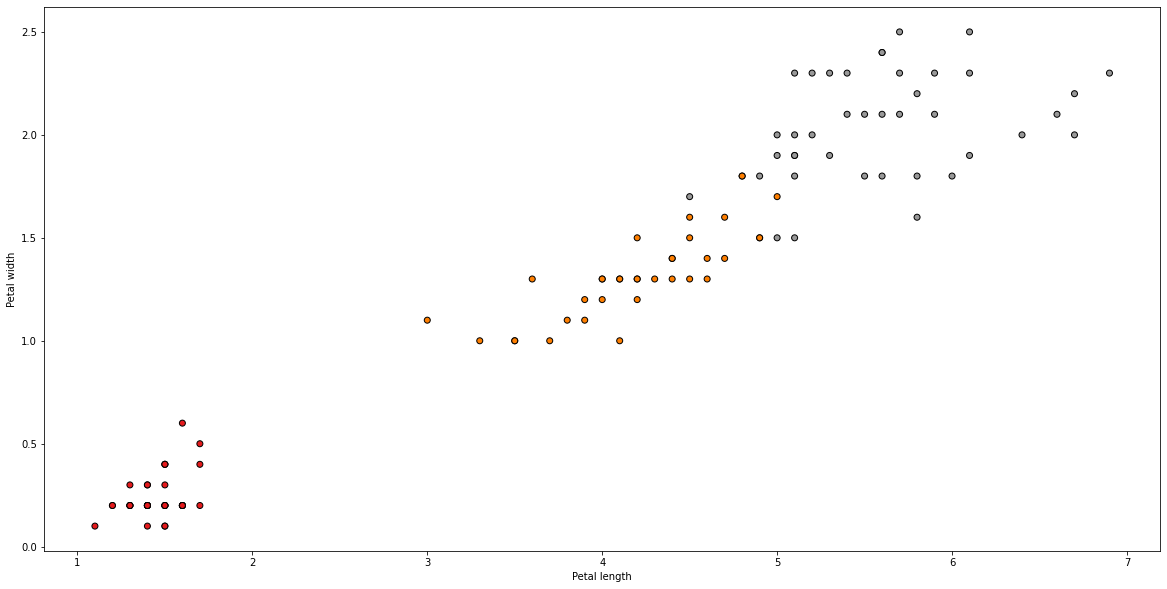

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_train[:, 2], X_train[:, 3],c=y_train, cmap=plt.cm.Set1,
           edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [ ]:
X_train.shape

(112, 4)

In [ ]:
from sklearn import preprocessing

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100) 
# By Default we uniform 
X_train_transformer = quantile_transformer.fit_transform(X_train)
X_test_transformer = quantile_transformer.transform(X_test)

In [ ]:
import numpy as np
np.percentile(X_train[:,0],[0,25,50,75,100])

array([4.3, 5.1, 5.8, 6.5, 7.9])

In [ ]:
np.percentile(X_test[:,0],[0,25,50,75,100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [ ]:
np.percentile(X_train_transformer[:,0],[0,25,50,75,100])

array([0.        , 0.23737374, 0.51010101, 0.74242424, 1.        ])

In [ ]:
np.percentile(X_test_transformer[:,0],[0,25,50,75,100])

array([0.01010101, 0.24873737, 0.47979798, 0.6031941 , 0.94144144])

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100,output_distribution='normal')
X_train_transformer = quantile_transformer.fit_transform(X_train)
X_test_transformer = quantile_transformer.transform(X_test)

In [ ]:
np.percentile(X_train[:,0],[0,25,50,75,100])

array([4.3, 5.1, 5.8, 6.5, 7.9])

In [ ]:
np.percentile(X_test[:,0],[0,25,50,75,100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [ ]:
np.percentile(X_train_transformer[:,0],[0,25,50,75,100])

array([-5.19933758, -0.71477599,  0.02532218,  0.65083731,  5.19933758])

In [ ]:
np.percentile(X_test_transformer[:,0],[0,25,50,75,100])

array([-2.32257453, -0.67969699, -0.05080764,  0.26164464,  1.56698962])

In [ ]:
PT_Johnson = preprocessing.PowerTransformer() # By Default we have this  method Yeo-johnson

In [ ]:
PT_Johnson.method

'yeo-johnson'

In [ ]:
PT_Box_cox = preprocessing.PowerTransformer(method="box-cox") # I am changing my method from Johnson to box_cox

In [ ]:
PT_Box_cox.method

'box-cox'

In [ ]:
rng = np.random.RandomState(304)

In [ ]:
QT_normal = preprocessing.QuantileTransformer(n_quantiles=500,
                                             output_distribution='normal',
                                             random_state=rng)

In [ ]:
QT_normal.n_quantiles

500

In [ ]:
N_SAMPLES = 1000
FONT_SIZE = 8
BINS = 30

In [ ]:
size = (N_SAMPLES,1)

In [ ]:
x_lognormal = rng.lognormal(size=size)

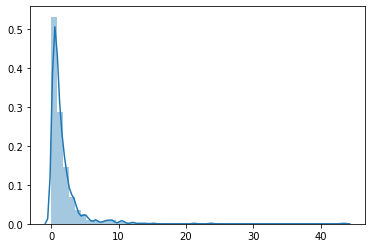

In [ ]:
sns.distplot(x_lognormal)

In [ ]:
df = 3
X_chisq = rng.chisquare(df=df,size=size)

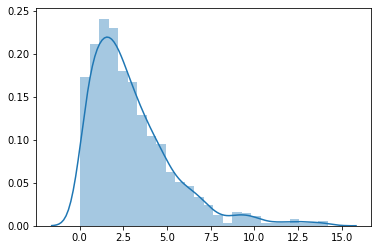

In [ ]:
sns.distplot(X_chisq)

In [ ]:
a = 50
X_weibull = rng.weibull(a=a,size=size) # weibull distribution

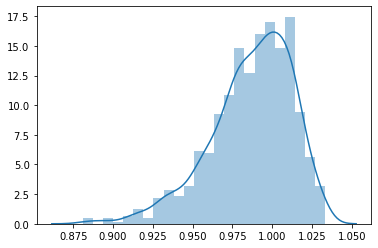

In [ ]:
sns.distplot(X_weibull)

In [ ]:
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

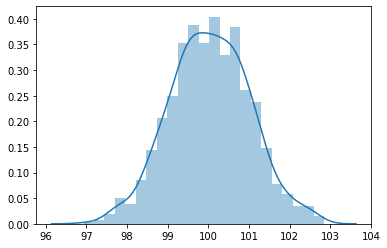

In [ ]:
sns.distplot(X_gaussian)

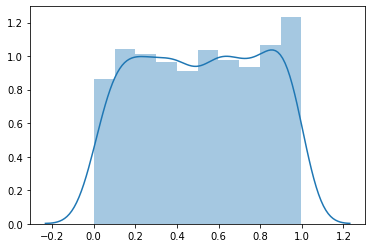

In [ ]:
X_uniform = rng.uniform(low=0, high=1, size=size)
sns.distplot(X_uniform)

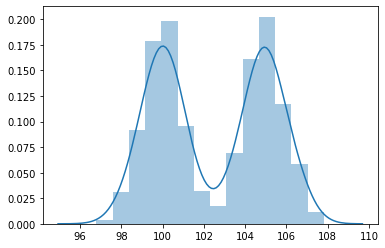

In [ ]:
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)
sns.distplot(X_bimodal)

In [ ]:
distributions = [
    ('Lognormal', x_lognormal),
    ('Chi-Squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

colors = ['#D81B60','#0188FF','#FFC107',
         '#B7A2FF','#000000','#2EC5AC']


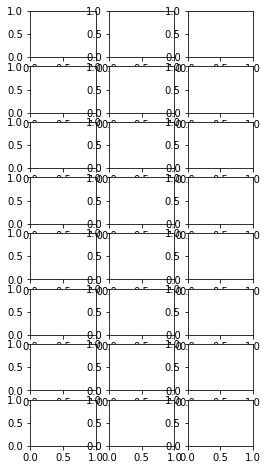

In [ ]:
fig,axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
            (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
            for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution


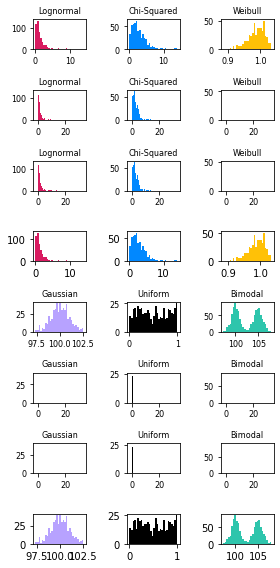

In [ ]:
fig,axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
            (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
            for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)
    
    # Perform power transform and quantile transform
    X_trans_bc = PT_Box_cox.fit(X_train).transform(X_test)
    lmbda_bc = round(PT_Box_cox.lambdas_[0], 2)
    
    X_trans_yj = PT_Johnson.fit(X_train).transform(X_test)
    lmbda_yj = round(PT_Johnson.lambdas_[0], 2)
    
    # Peform power transform
    X_trans_qt = QT_normal.fit(X_train).transform(X_test)
    
    ax_original, ax_bc, ax_yj, ax_qt = axes 
    ax_original.hist(X_train, color=color, bins=BINS) 
    ax_original.set_title(name, fontsize=FONT_SIZE) 
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
    
    for ax, X_trans,meth_name, lmbda in zip((ax_bc, ax_yj, ax_qt),
                  (X_trans_bc, X_trans_yj, X_trans_qt),
                  ('Box-cox', 'Yeo-Johnson', 'Quantile transform'),
                  (lmbda_bc, lmbda_yj,None)):
        ax.hist(X_train, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
            ax.set_title(name, fontsize=FONT_SIZE)
            ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
            ax.set_xlim([-3.5,35])
plt.tight_layout()
plt.show()
